<a href="https://colab.research.google.com/github/SyedOmarAli/WeedDetection/blob/main/WeedDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import zipfile
import os


In [23]:
zip_path = "/content/cropnweed_detection.zip"
extract_path = "/content/cropnweed_detection_dataset"

In [24]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [25]:
os.listdir(extract_path)

['agri_data', 'classes.txt']

In [26]:
!pip install ultralytics

In [28]:

base = "/content/cropnweed_detection_dataset"

for split in ["train", "val"]:
    os.makedirs(f"{base}/{split}/images", exist_ok=True)
    os.makedirs(f"{base}/{split}/labels", exist_ok=True)

print("Folder structure created")

Folder structure created


In [38]:
import os, random, shutil

src = "/content/cropnweed_detection_dataset/agri_data/data"

files = [f for f in os.listdir(src) if f.endswith((".jpg", ".png", ".jpeg"))]
random.shuffle(files)

split_idx = int(0.8 * len(files))
train_files = files[:split_idx]
val_files = files[split_idx:]

def move(files, split):
    for img in files:
        lbl = img.rsplit(".", 1)[0] + ".txt"
        shutil.copy(f"{src}/{img}", f"{base}/{split}/images/{img}")
        shutil.copy(f"{src}/{lbl}", f"{base}/{split}/labels/{lbl}")

move(train_files, "train")
move(val_files, "val")

print("Data split into train / val")

Data split into train / val


In [39]:
!cat /content/cropnweed_detection_dataset/classes.txt

crop
weed

In [40]:
yaml_content = """
path: /content/cropnweed_detection_dataset
train: train/images
val: val/images

nc: 2
names: ['crop', 'weed']
"""

with open("/content/cropnweed_detection_dataset/data.yaml", "w") as f:
    f.write(yaml_content)

print("data.yaml created")

data.yaml created


In [41]:
!ls /content/cropnweed_detection_dataset/train/images | head

agri_0_1009.jpeg
agri_0_1017.jpeg
agri_0_1024.jpeg
agri_0_1026.jpeg
agri_0_1041.jpeg
agri_0_1068.jpeg
agri_0_106.jpeg
agri_0_1079.jpeg
agri_0_1082.jpeg
agri_0_1083.jpeg


In [43]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

model.train(
    data="/content/cropnweed_detection_dataset/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.243 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/cropnweed_detection_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac05f683650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [44]:
from IPython.display import Image, display
import glob


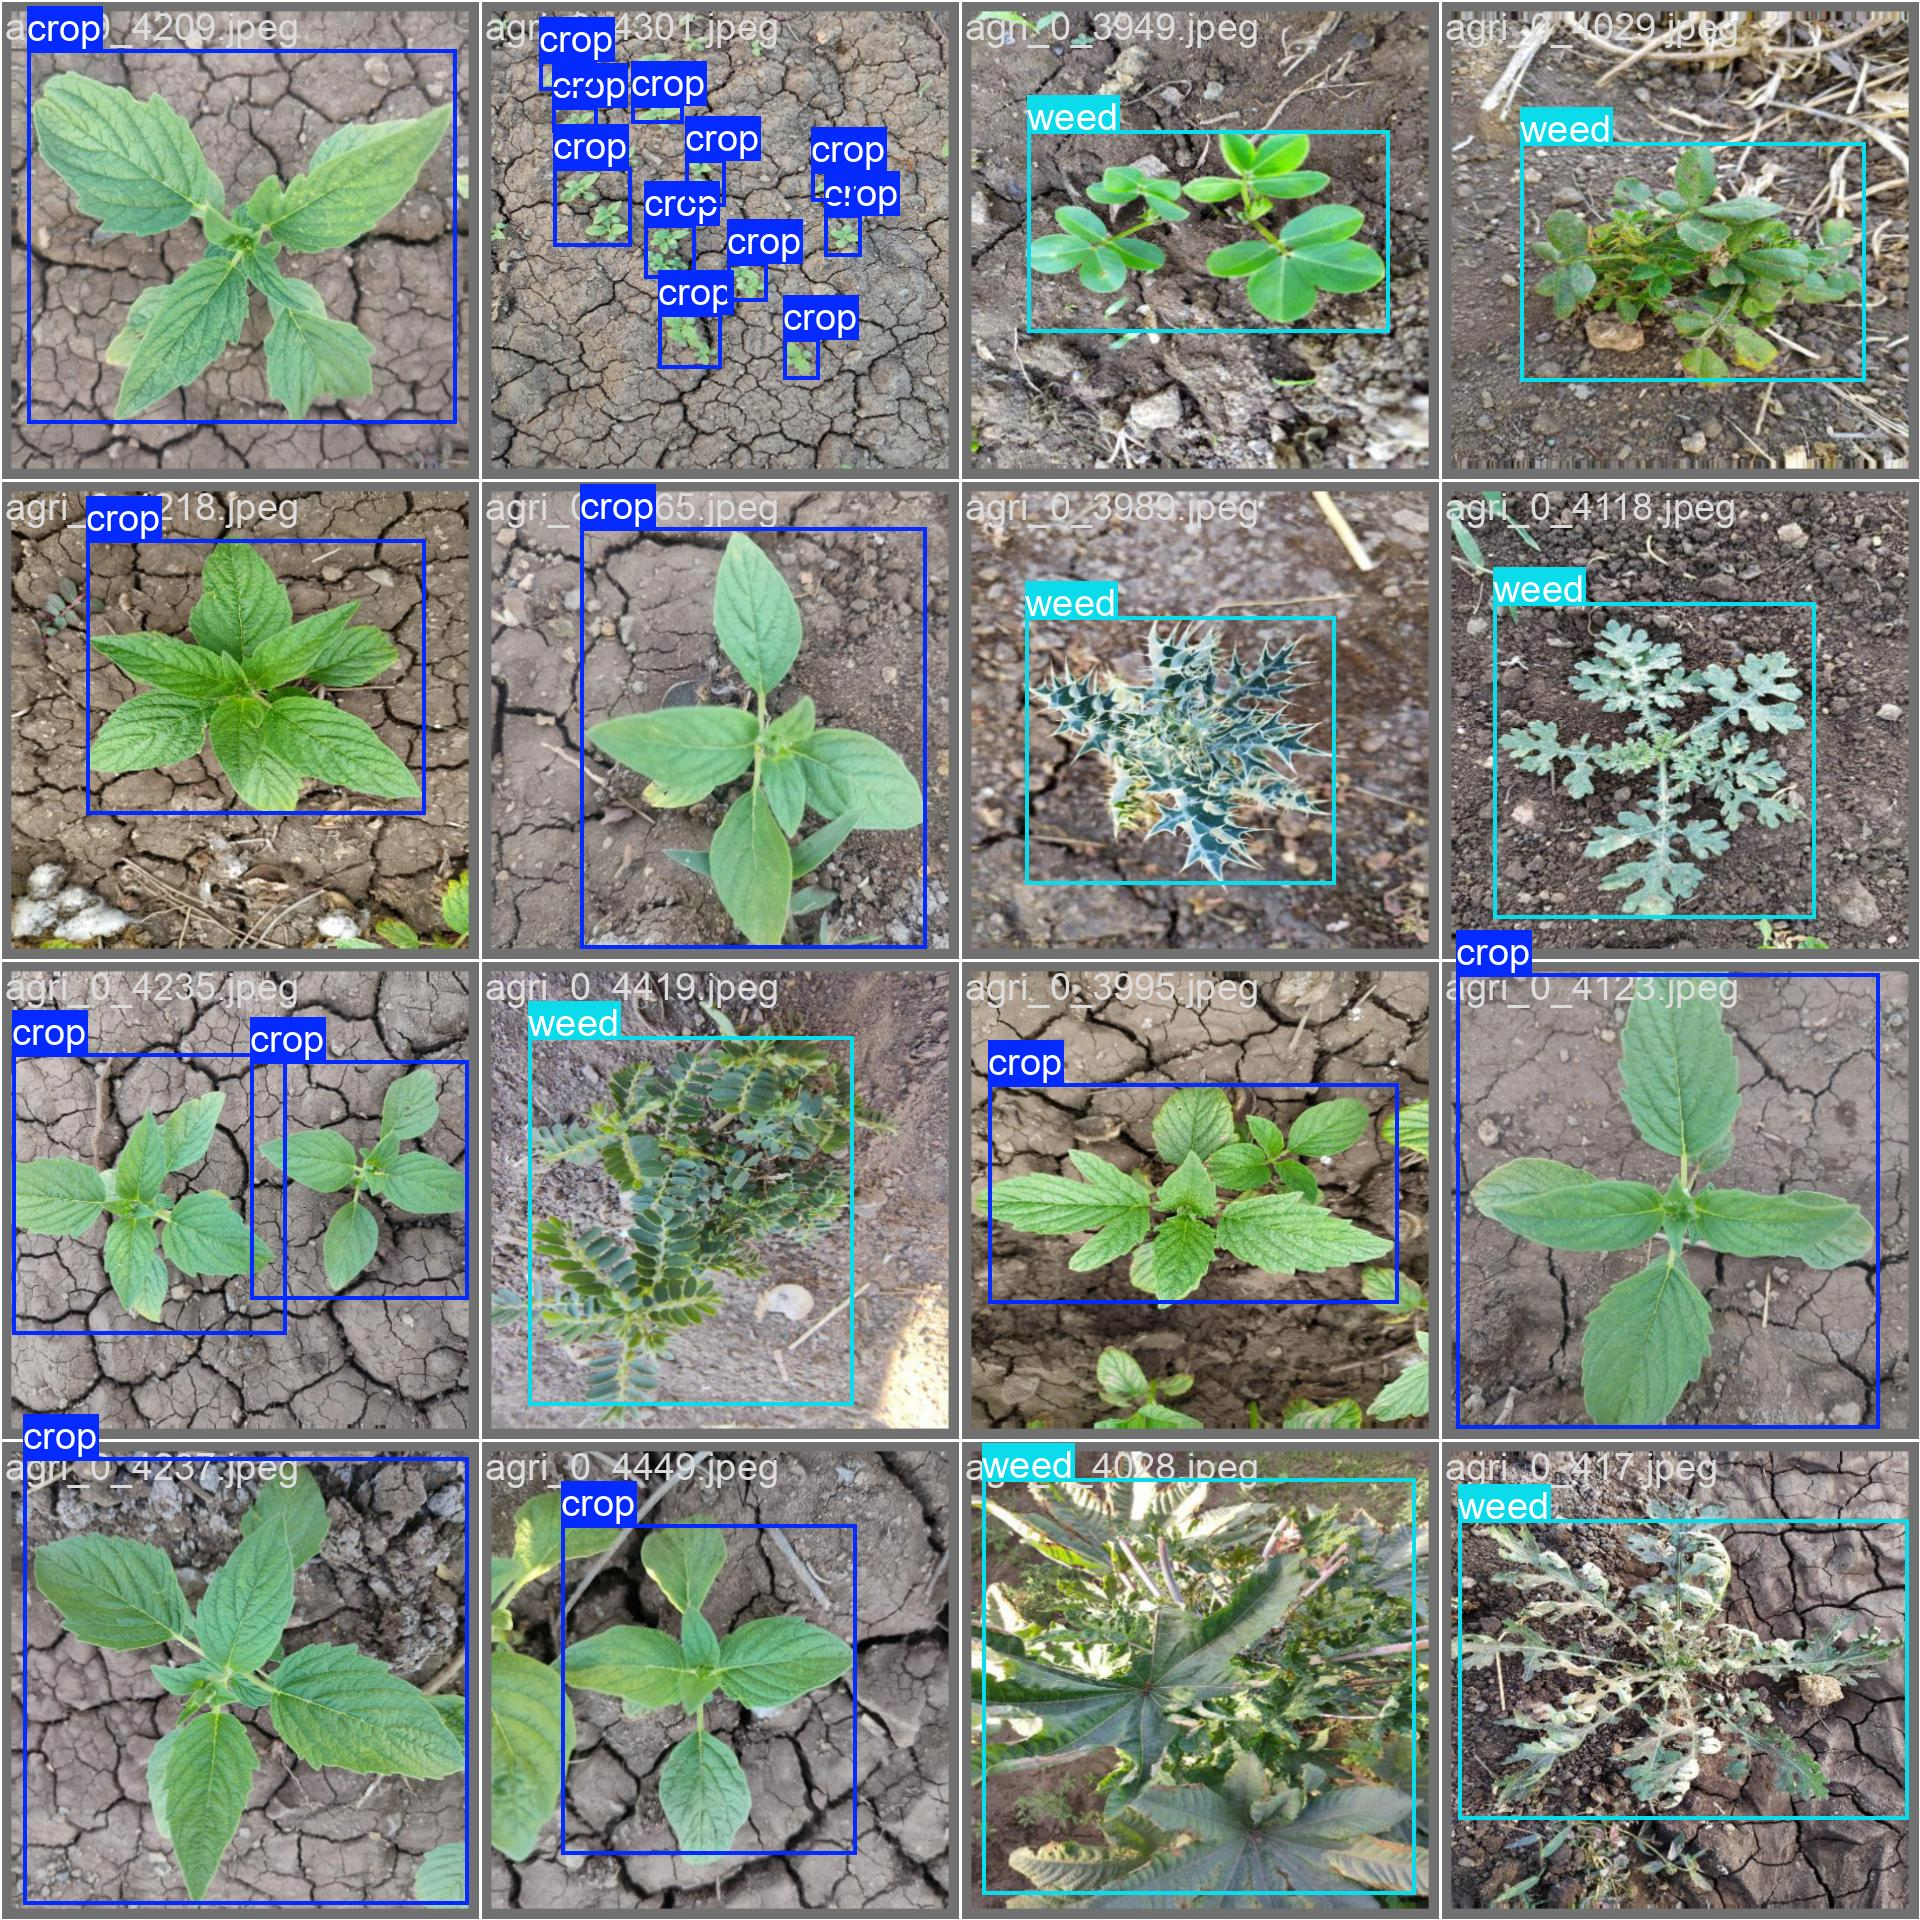

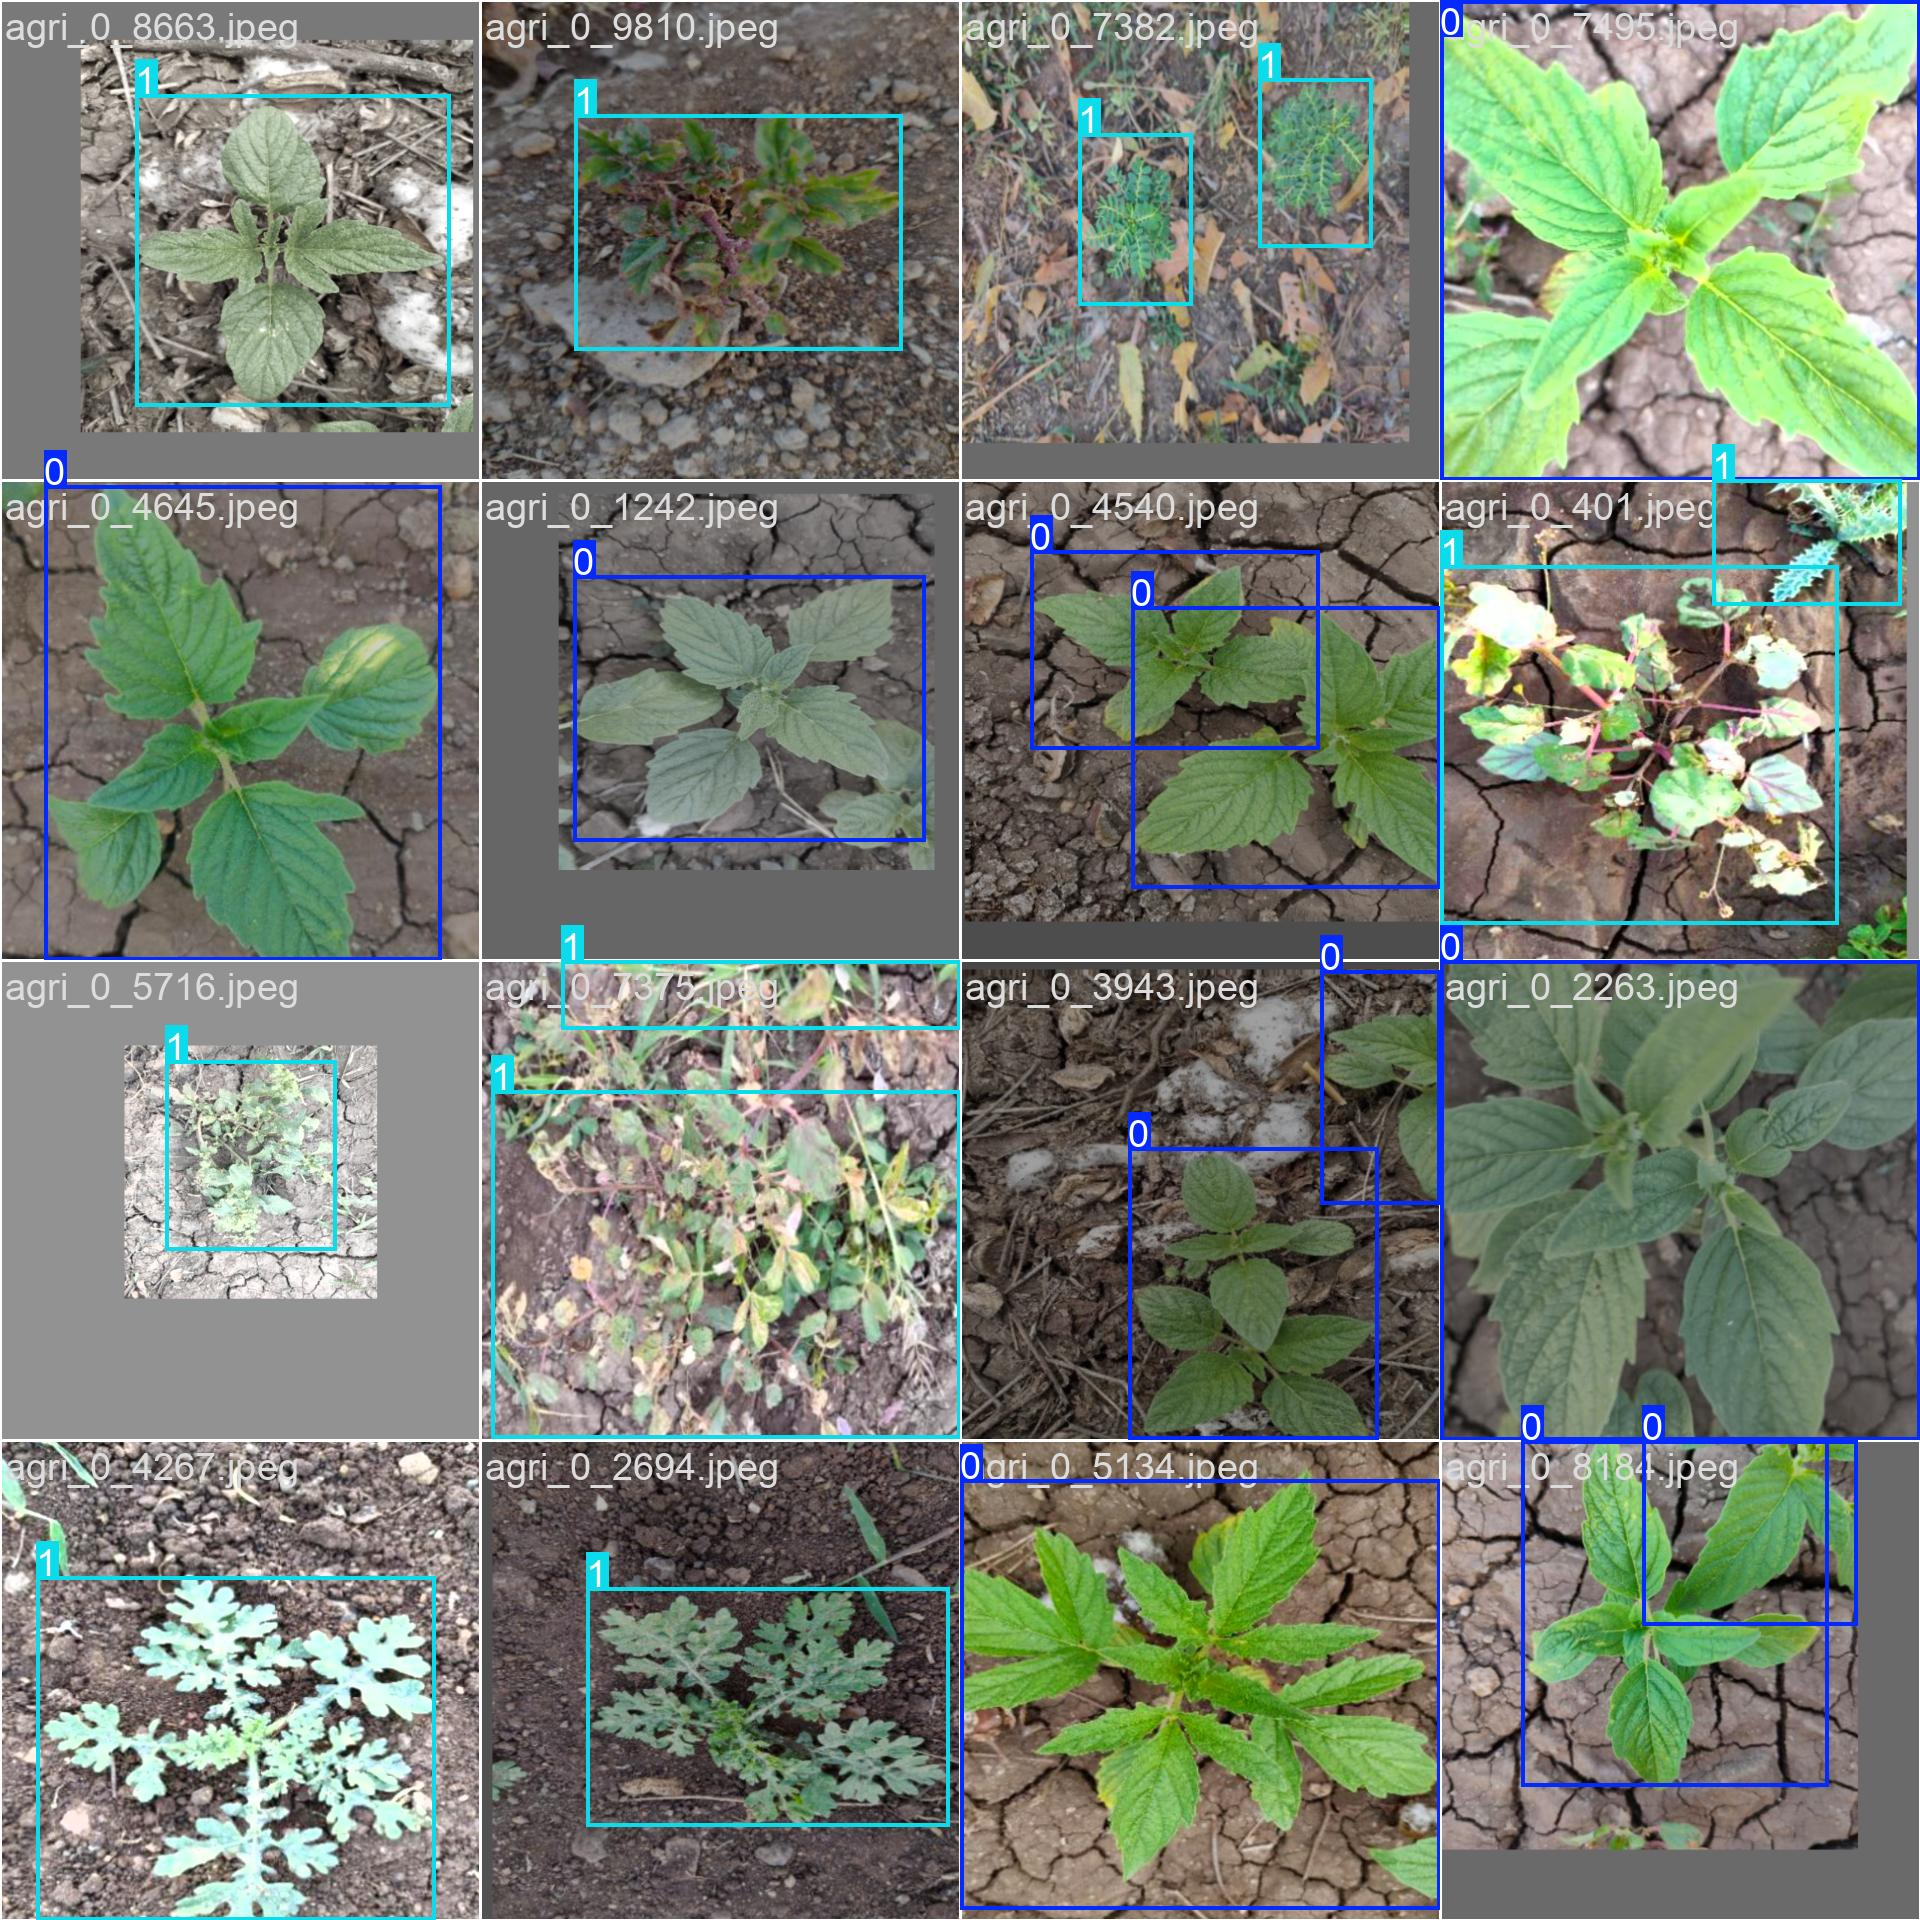

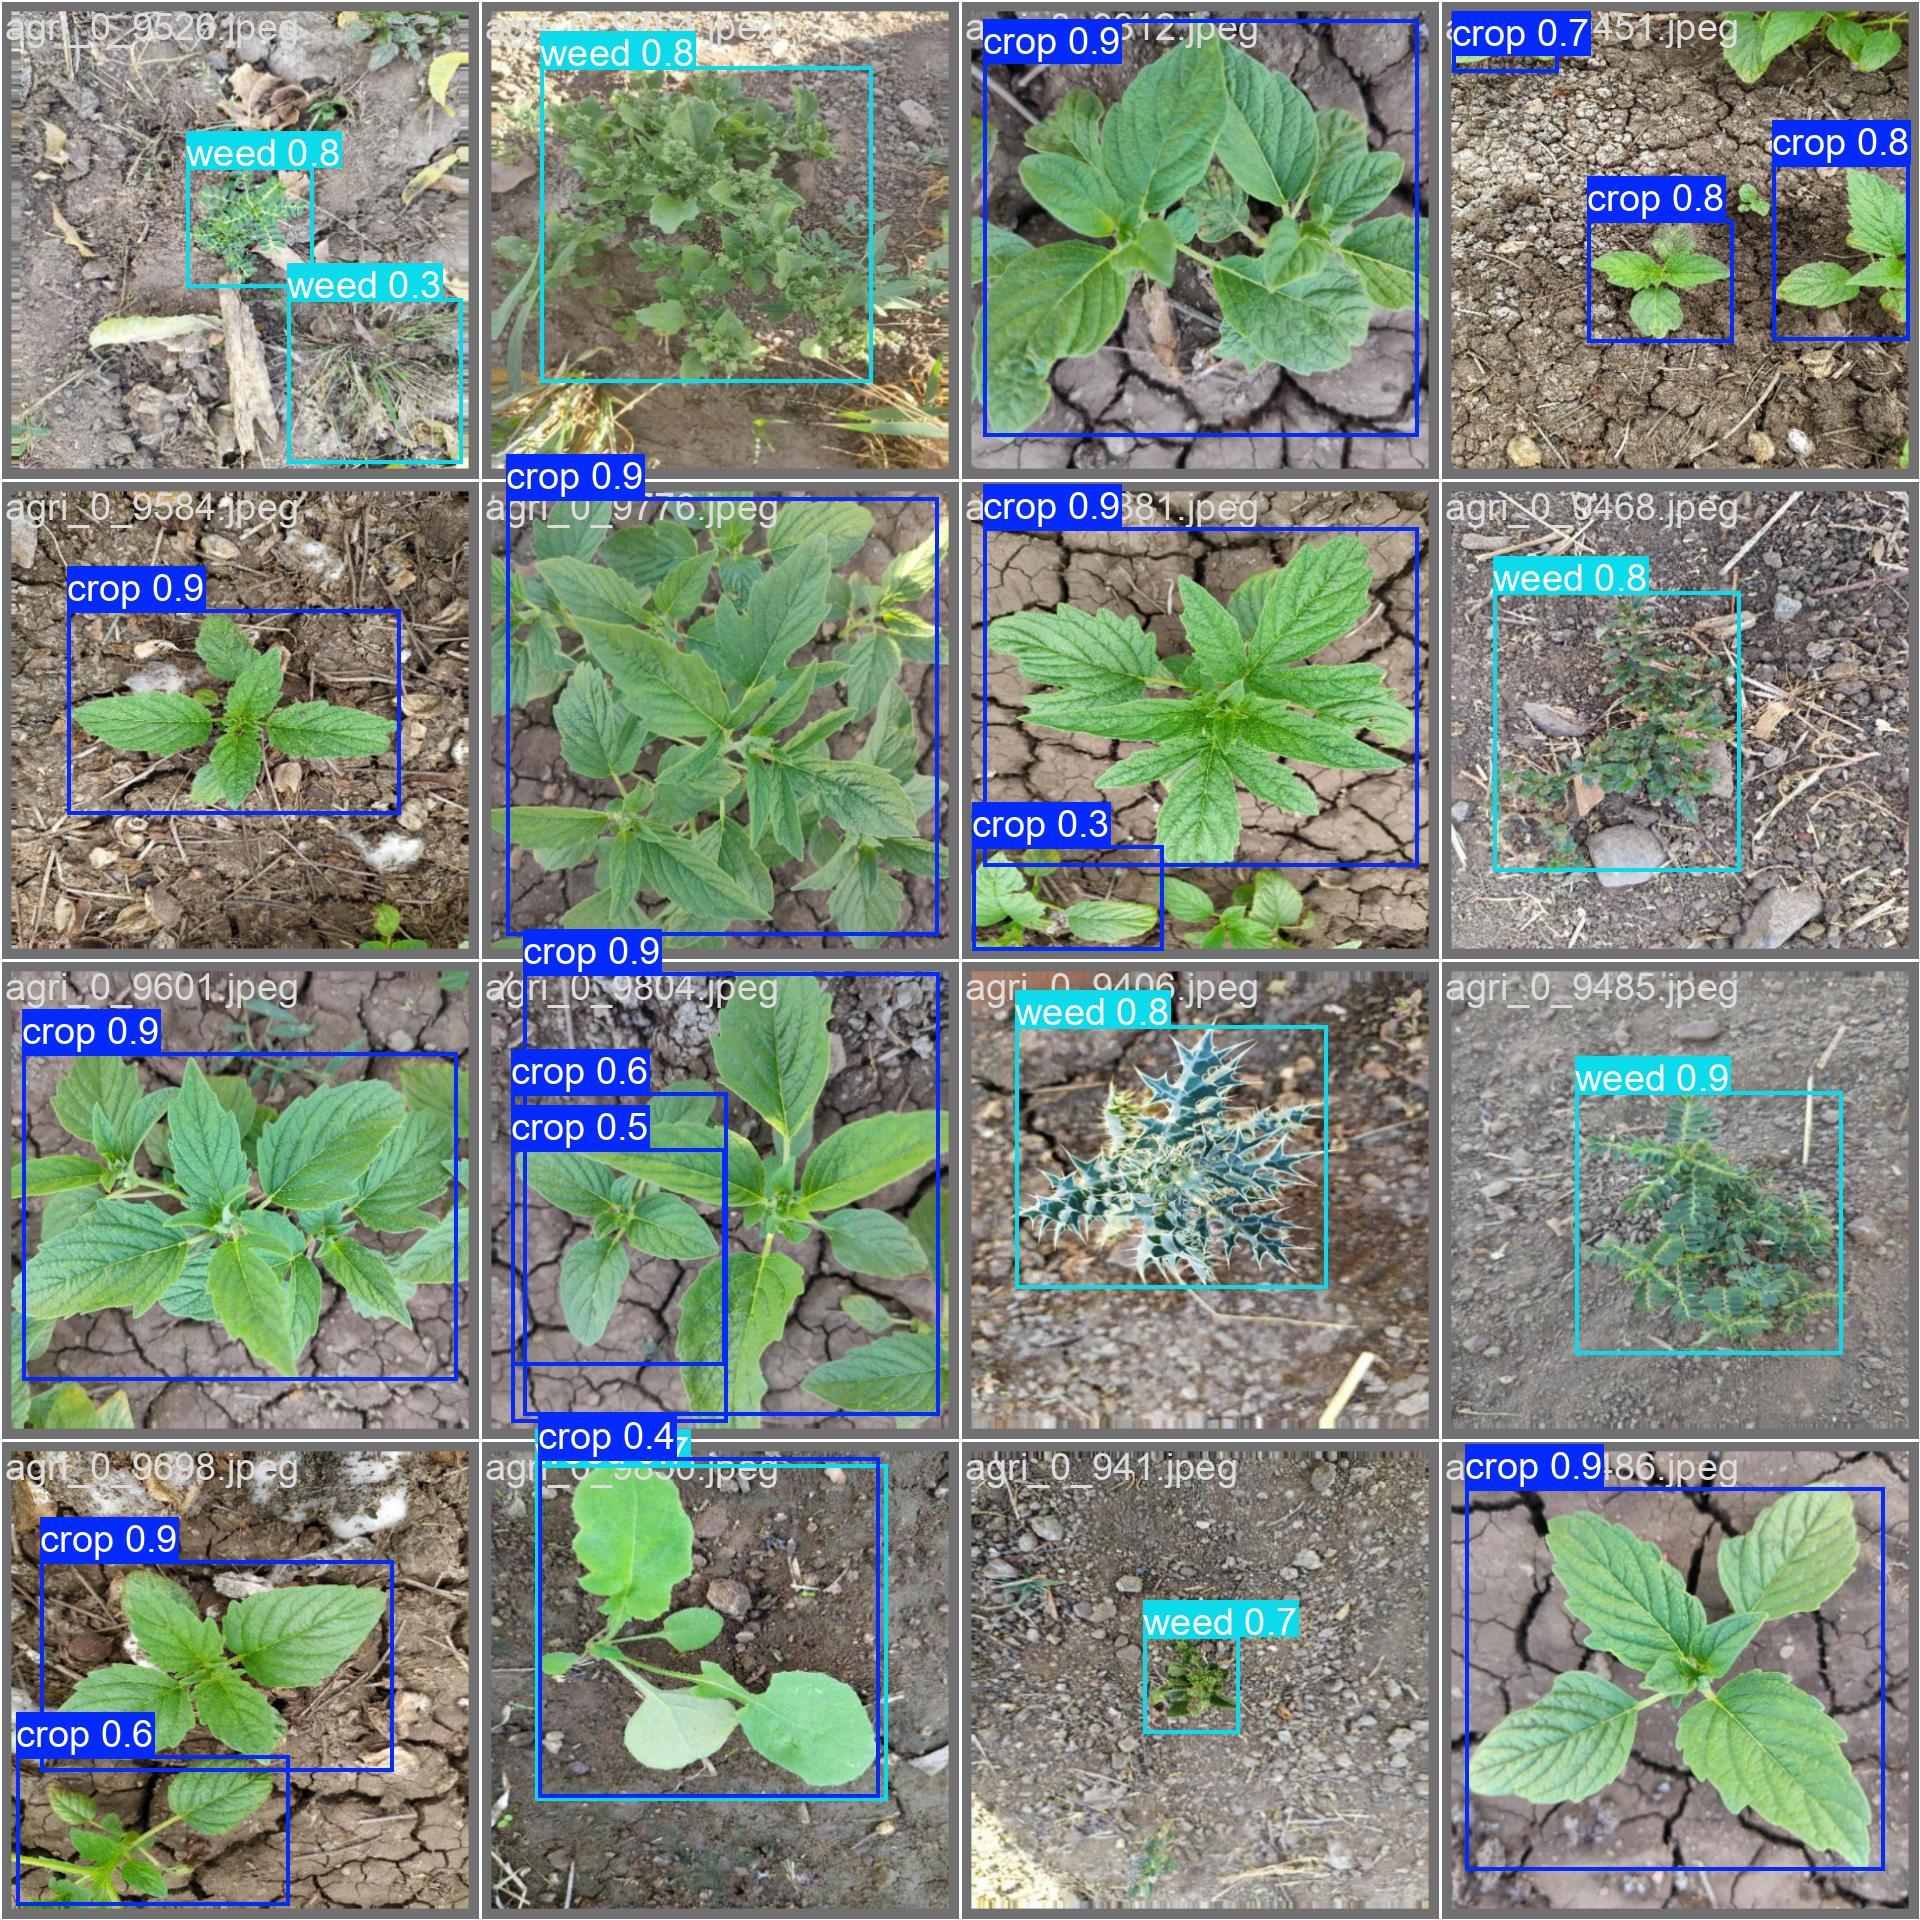

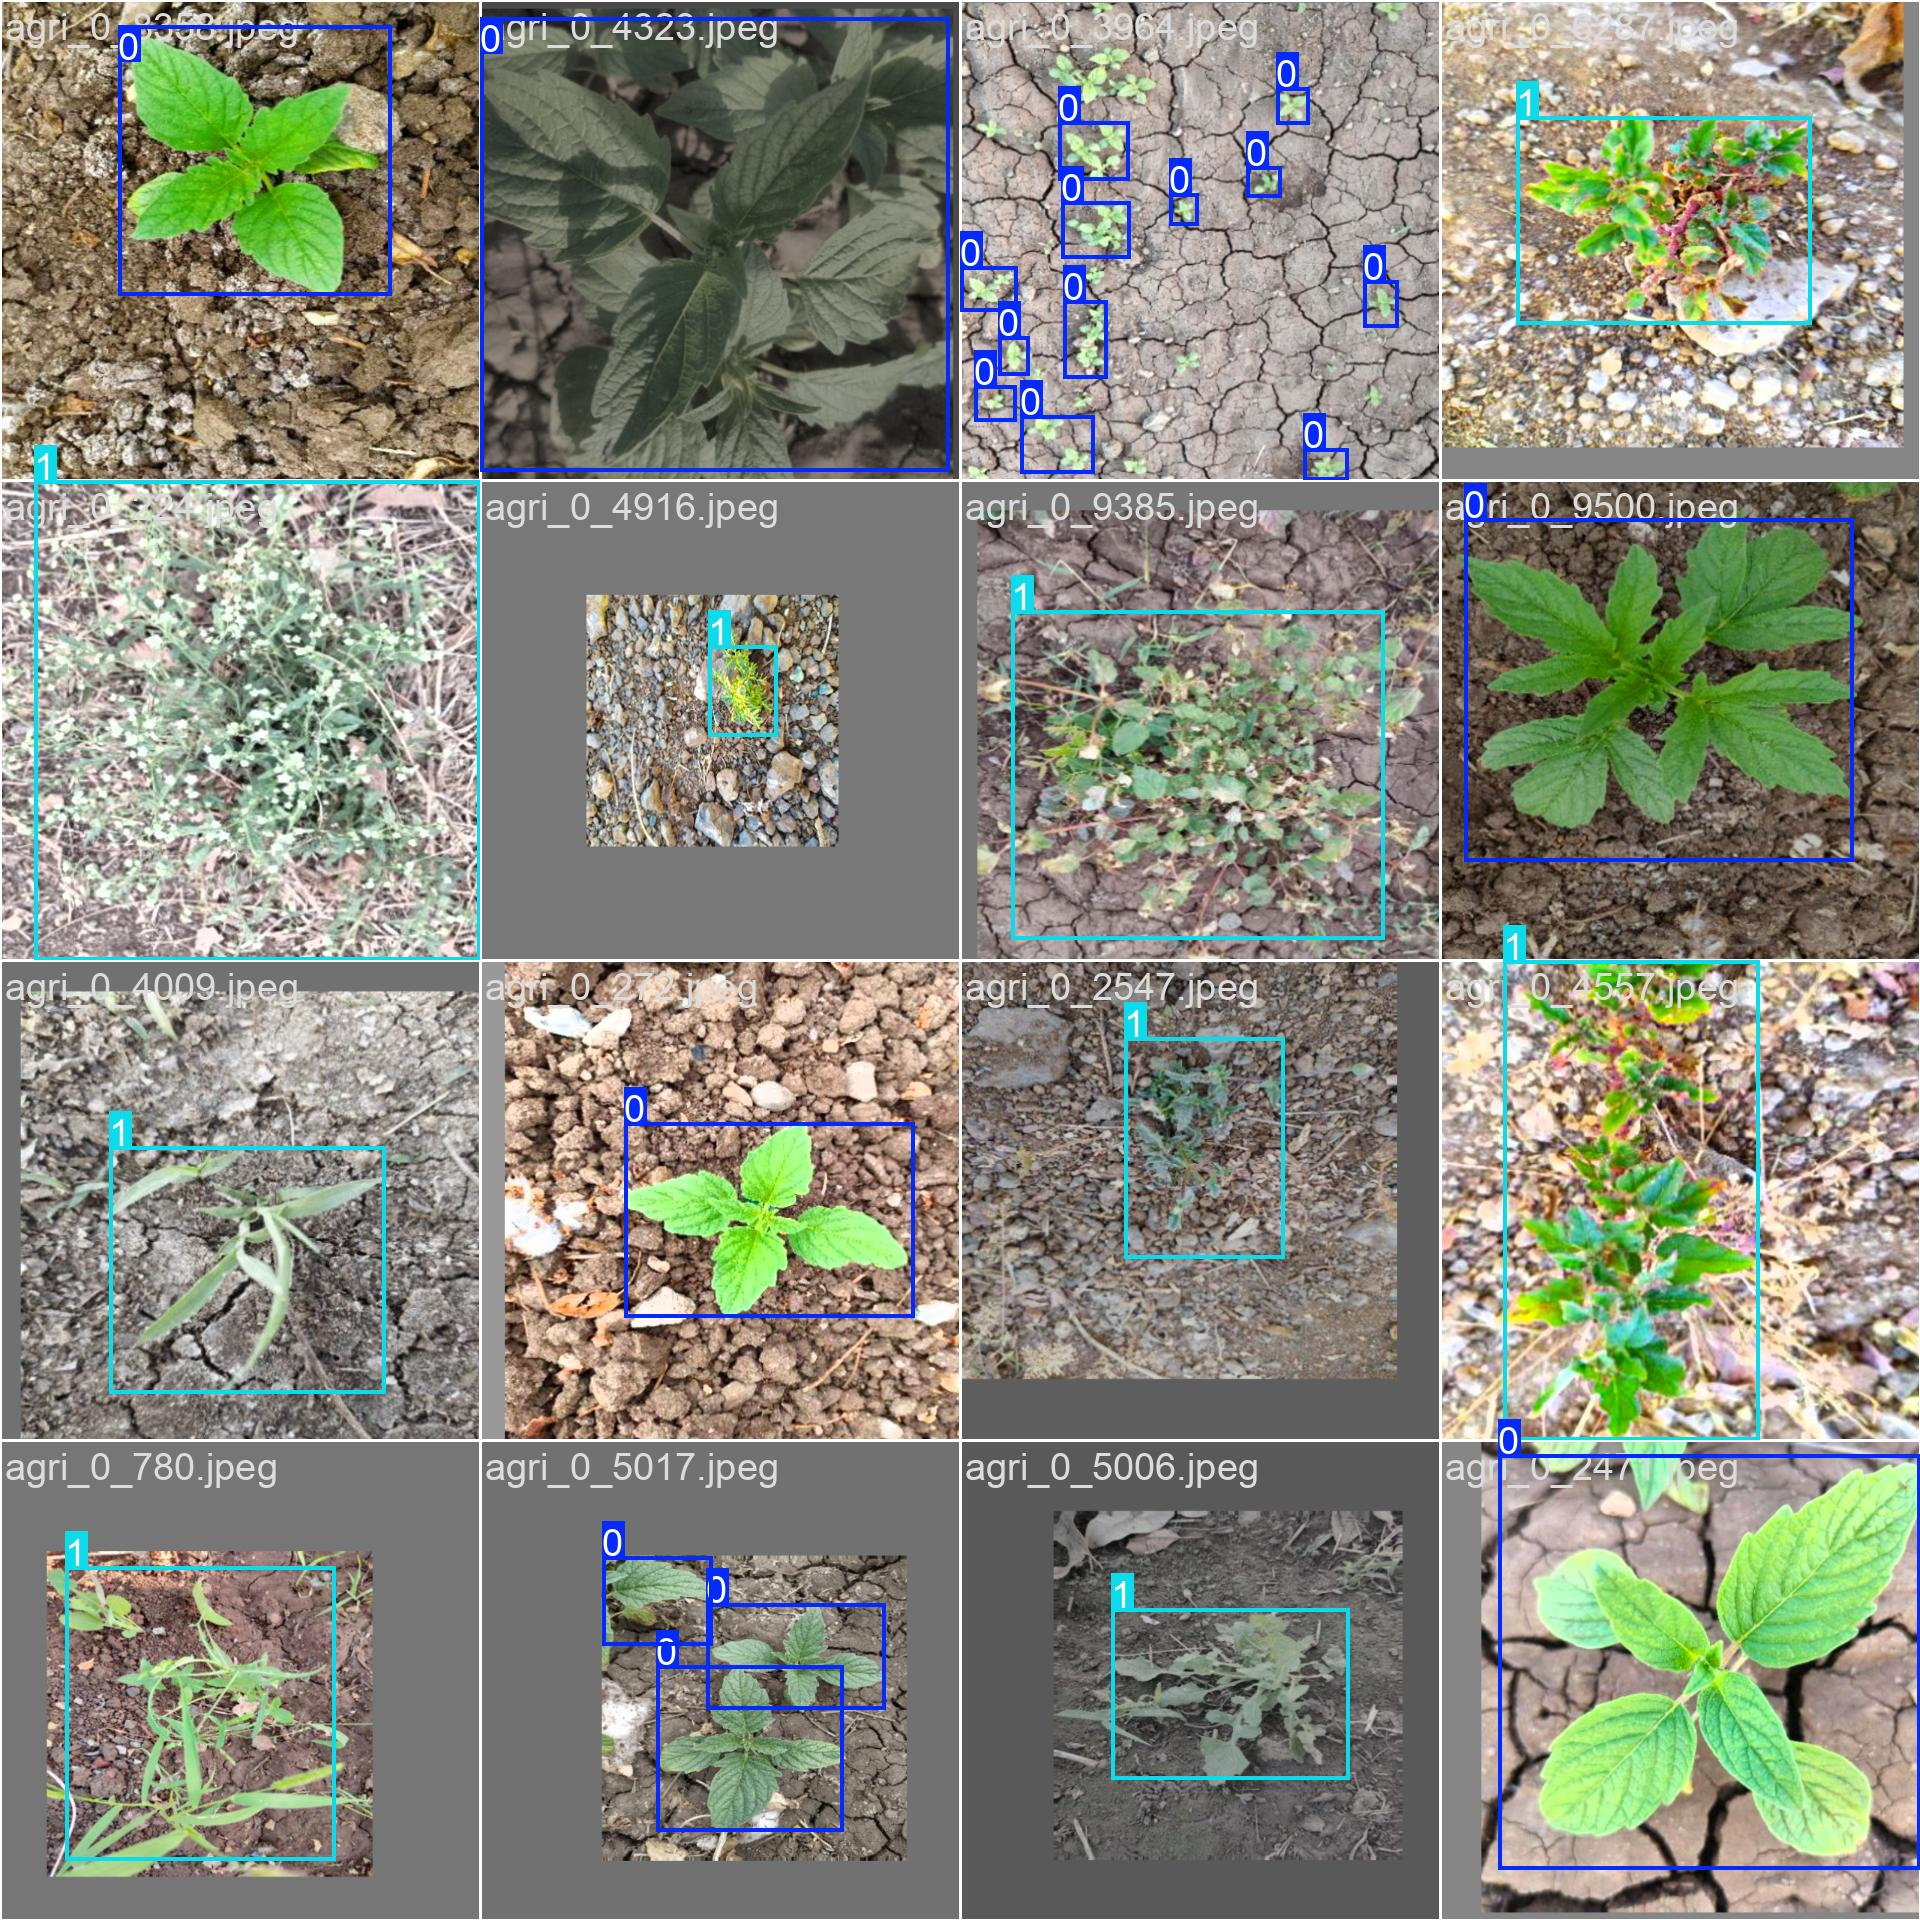

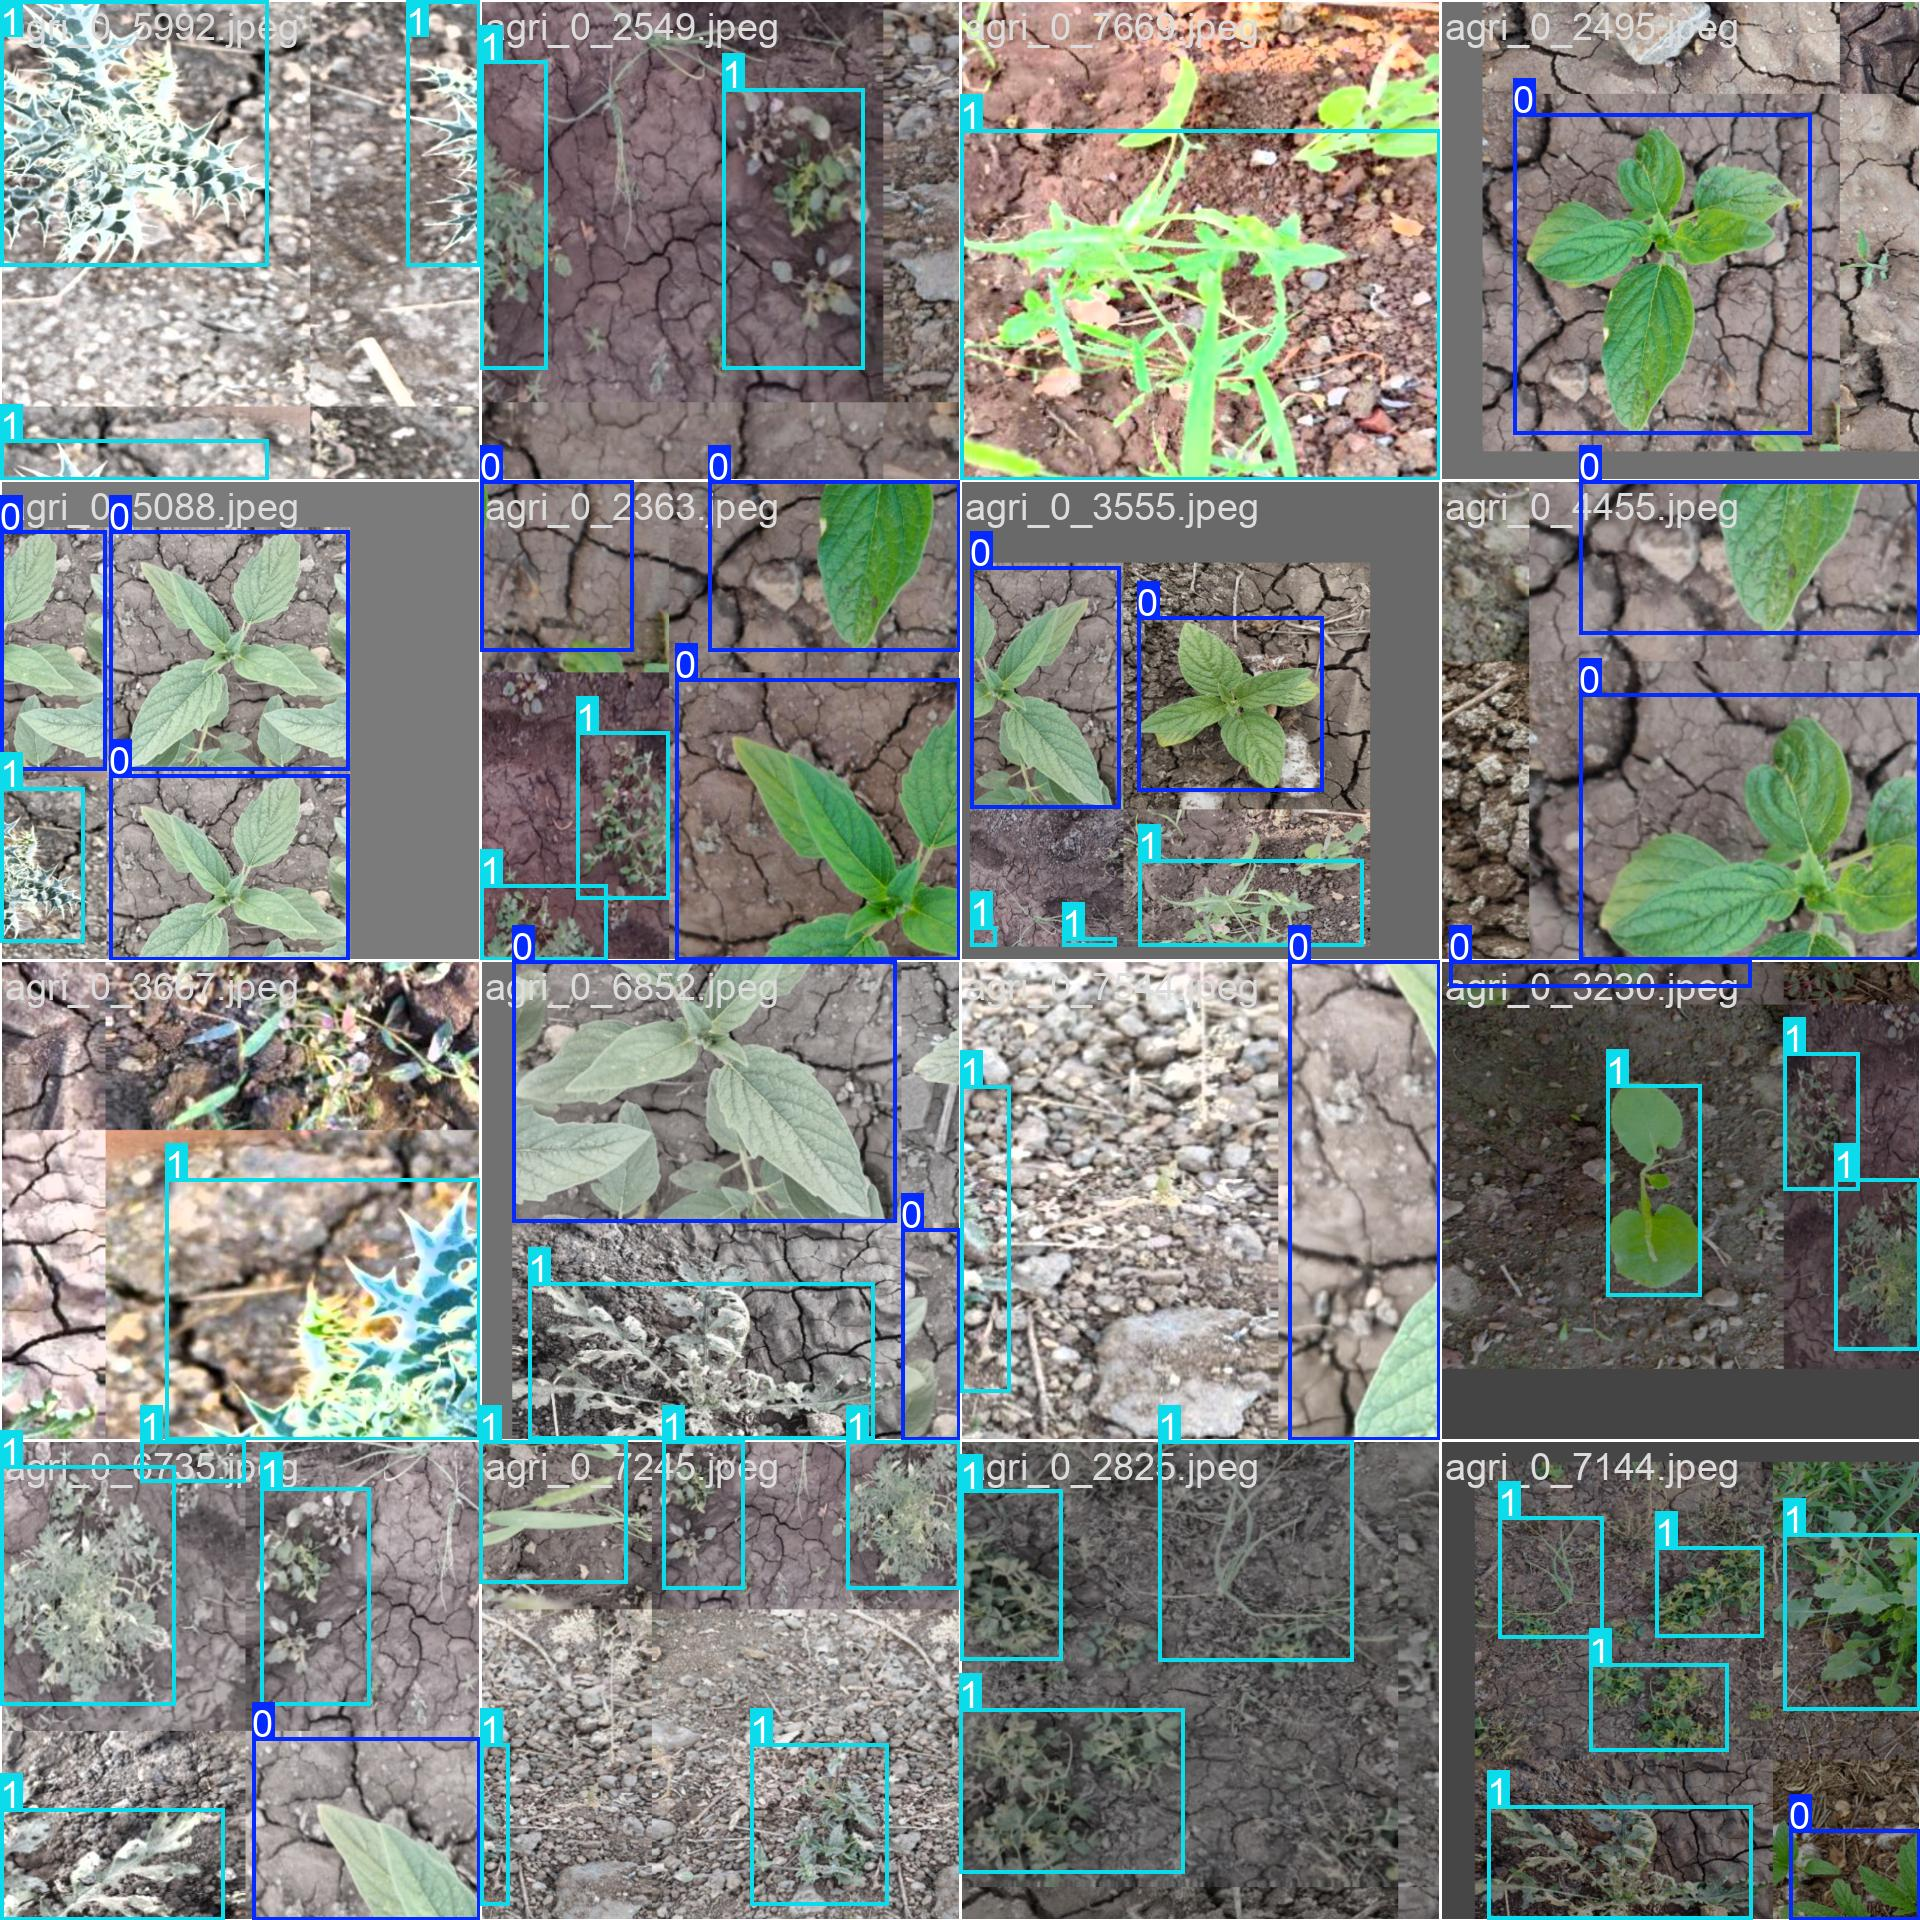

In [46]:
for img in glob.glob("runs/detect/train/*.jpg")[:5]:
    display(Image(filename=img))

In [47]:
!pip install gradio

In [48]:
model = YOLO("runs/detect/train/weights/best.pt")

In [49]:
import cv2
import numpy as np


In [50]:
def detect_objects(image):
    # YOLO prediction
    results = model.predict(image, conf=0.5)

    # Bounding boxes drawn
    annotated_image = results[0].plot()

    # BGR → RGB (for Gradio)
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    return annotated_image

In [51]:
import gradio as gr


In [52]:
interface = gr.Interface(
    fn=detect_objects,
    inputs=gr.Image(type="numpy", label="Upload Image"),
    outputs=gr.Image(type="numpy", label="Detected Output"),
    title="Helmet Detection System",
    description="YOLO-based Object Detection using Deep Learning",
)

In [ ]:
interface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4f184ff635b86351ec.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



0: 640x640 1 weed, 10.3ms
Speed: 2.9ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
